# 붓꽃 품종 예측하기

1. 데이터 셋 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델 학습
3. 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터 분류 (붓꽃 종류)를 예측
4. 모델 평가 : 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML 모델 성능 비교 

## 데이터 수집

In [14]:
from sklearn.datasets import load_iris

iris = load_iris()

#x값
iris_data = iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
#y값
iris_label = iris.target
iris_label, iris.target_names, iris.feature_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [12]:
import pandas as pd
iris_df = pd.DataFrame(data= iris_data, columns= iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## 데이터 분할

In [17]:
# 학습용 데이터, 테스트용 데이터 분리 
from sklearn.model_selection import train_test_split

#iris_data: 피쳐 데이터 셋 , iris_label: 레이블 데이터 셋 
#test_size : 테스트 데이터 셋의 비율
#random_state : 난수 발생 값 
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size= 0.2, random_state= 11)


## 모델 생성

In [23]:
from sklearn.tree import DecisionTreeClassifier

#깡통 모델 생성
dt_clf = DecisionTreeClassifier(random_state=11)

#모델 학습
dt_clf.fit(X_train, y_train)

#예측 수행 (테스트용 피쳐 값 입력 -> 예측 라벨값 반환) 
pred = dt_clf.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

## 모델 평가

In [26]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


## 교차 검증 : Cross Validation

In [34]:
from sklearn.model_selection import KFold
import numpy as np

kfold = KFold(n_splits=5)
cv_accuracy = []

features = iris.data
label = iris.target
n_iter = 0

for train_index, test_index in kfold.split(features):
    #kfold.split()으로 반환된 이덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1 
    
    #반복할 때마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter,accuracy,train_size,test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n## 평균 검증 정확도:',np.round(np.mean(cv_accuracy),4))
    


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.8333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.92


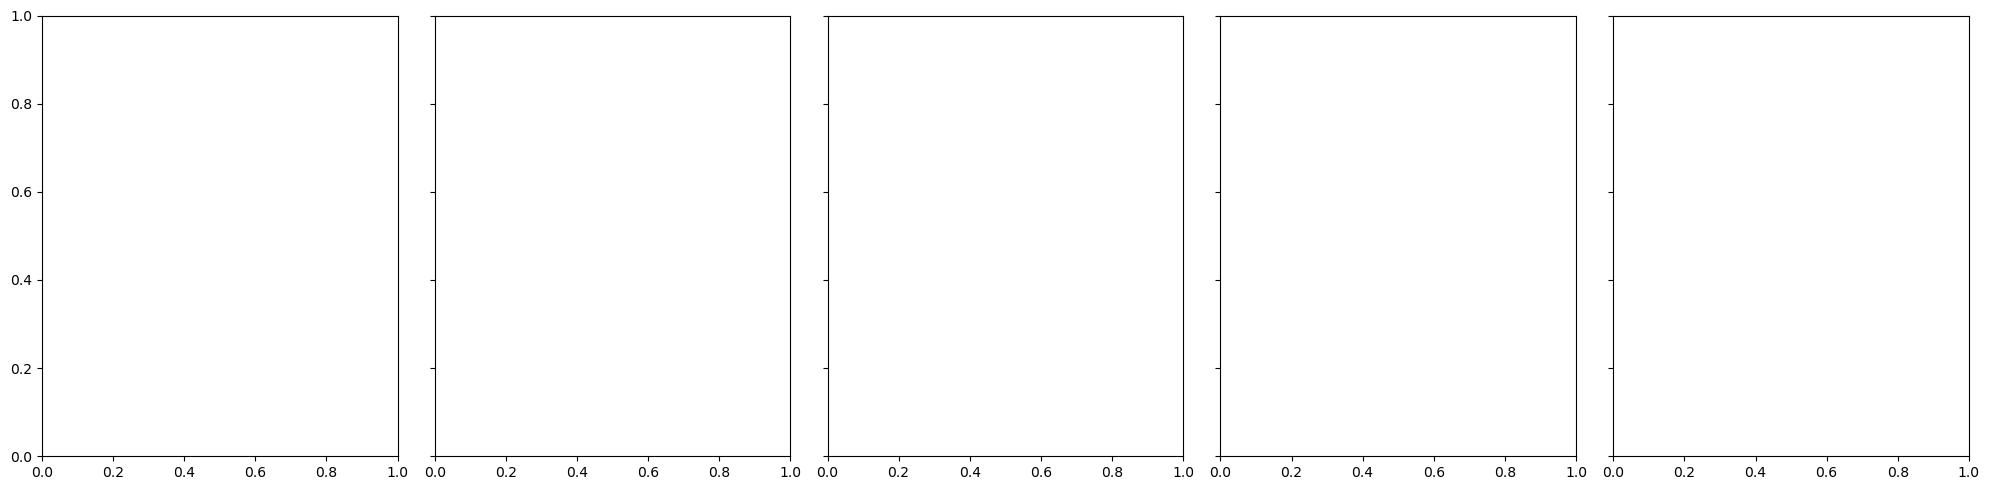

In [38]:
# 교차 검증 데이터의 분포 시각화
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True, sharey=True)
for i, (X_train, y_train, X_test, y_test) in enumerate(fold_data):
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', alpha=0.6, label='Train')
    axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='s', label='Test')
    axes[i].set_title(f'Fold {i + 1}')
    axes[i].legend()

plt.tight_layout()
plt.show()


## Stratified k-Fold Cross Validation

In [56]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [57]:
kfold = KFold(n_splits = 3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n',label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


In [60]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits= 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n',label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())


## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


### 교차검증 모델 생성

In [63]:
dt_clf = DecisionTreeClassifier(random_state = 1)
skfold = StratifiedKFold(n_splits = 3)

features = iris.data
label = iris.target
n_iter = 0
cv_accuracy = []

#StratifiedKFold의 split 출력시 반드시 레이블 데이터 셋도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    
    #데이터 분할
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #모델 학습(n=3)
    dt_clf.fit(X_train, y_train)
    
    #예측
    pred = dt_clf.predict(X_test)
    
    #정확도 검증 
    n_iter += 1 
    accuracy= np.round(accuracy_score(y_test, pred),4)
    cv_accuracy.append(accuracy)

print('## 평균 검증 정확도', np.round(np.mean(cv_accuracy),4))

## 평균 검증 정확도 0.9733


## 교차 검증을 보다 간편하게 : cross_val_score()

In [69]:
from sklearn.model_selection import cross_val_score, cross_validate

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 1)

data = iris_data.data
label = iris_data.target

#성능 지표는 accruacy, 교차 검증 셋은 3개 
scroes  = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv=3)
print('## 교차 검증별 정확도', np.round((scroes),4))
print('## 평균 검증 정확도', np.round(np.mean(scroes),4))

## 교차 검증별 정확도 [0.98 0.94 1.  ]
## 평균 검증 정확도 0.9733


## GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

iris_data = iris.data
iris_label = iris.target 

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size= 0.2, random_state= 121)
dt_clf2 = DecisionTreeClassifier(random_state = 121) # estimator

#parameter grid 생성 (dictionary type)
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

#param grid : hyper parameter를 3개의 train, test set fold로 나누어 테스트 수행 설정 
#refit: default가 True
grid_dt_clf2 = GridSearchCV(dt_clf2, param_grid = parameters, cv=3, refit = True )

#모델 학습
grid_dt_clf2.fit(X_train,y_train)

scroes_df = pd.DataFrame(grid_dt_clf2.cv_results_)
scroes_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [77]:
print("GridSearchCV 최적 파라미터:",grid_dt_clf2.best_params_)
print("GridSearchCV 최적 정확도:",grid_dt_clf2.best_score_)

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최적 정확도: 0.975


In [80]:
#최적 모델 
estimator = grid_dt_clf2.best_estimator_

#GridSearchCV의 best_estimator_는 이미 최적 학습이 되어있어 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 셋 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 셋 정확도: 0.9667
